# L-Systems (Lindenmayer Systems) Lab

## Introduction

L-Systems are parallel rewriting systems that were introduced by Aristid Lindenmayer in 1968. They are particularly useful for modeling plant growth and generating fractals. In this lab, we'll explore how to create various patterns using L-Systems.

### Key Concepts:
- **Axiom**: The initial state/string
- **Production Rules**: Rules that define how to replace characters
- **Iterations**: Number of times to apply the rules
- **Turtle Graphics**: System for visualizing the L-System output

Let's start by importing our required libraries:

In [1]:
! pip install ColabTurtle

  Preparing metadata (setup.py) ... done
  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7643 sha256=874641969c31877f3c0c7b501318274ea68ea98de6bb9b3cc6c998bd50ae07cb
  Stored in directory: /root/.cache/pip/wheels/9f/af/64/ffd85f9858ed7d56b7293dcedbc9d461bf13c8cfc97e352bc8
Successfully built ColabTurtle


In [41]:
import ColabTurtle.Turtle as t
from IPython.display import clear_output

## Part 1: Basic L-System Implementation

First, let's implement our core L-System functions. These will be used throughout the lab to generate and draw various patterns.

In [39]:
def create_l_system(iterations, axiom, rules):
    """Generate L-System instructions based on axiom and rules."""
    result = axiom
    for _ in range(iterations):
        new_string = ""
        for char in result:
            new_string += rules.get(char, char)
        result = new_string
    return result

def draw_l_system(instructions, angle, distance):
    """Draw the L-System using turtle graphics.

    Parameters:
    - instructions: string of L-System commands
    - angle: turning angle in degrees
    - distance: forward movement distance
    """
    stack = []
    for cmd in instructions:
        if cmd == 'F':  # Move forward and draw
            t.forward(distance)
        elif cmd == 'f':  # Move forward without drawing
            t.penup()
            t.forward(distance)
            t.pendown()
        elif cmd == '+':  # Turn right
            t.right(angle)
        elif cmd == '-':  # Turn left
            t.left(angle)
        elif cmd == '[':  # Save current state
            stack.append((t.position(), t.heading()))
        elif cmd == ']':  # Restore previous state
            position, heading = stack.pop()
            t.penup()
            t.goto(position)
            t.setheading(heading)
            t.pendown()

def setup_turtle():
        t.initializeTurtle()
        t.hideturtle()
        t.speed(13)  # Fastest speed
        t.penup()
        t.goto(t.window_width() // 2, t.window_height() - 50)  # Start position
        t.pendown()


## Exercise 1: Koch Curve

The Koch curve is a classic example of a fractal pattern. Let's create it using our L-System:

In [ ]:
# Koch curve parameters
koch_axiom = "F"
koch_rules = {"F": "F+F[F]-F-F[F+F]+F"}
koch_iterations = 3
koch_angle = 65

# Generate and draw
setup_turtle()
t.pensize(2)
koch_instructions = create_l_system(koch_iterations, koch_axiom, koch_rules)
draw_l_system(koch_instructions, koch_angle, 5)

### Exercise 1 Tasks:
1. Try modifying the number of iterations (start with small numbers like 2-4)
2. Change the angle to 60 degrees and observe the difference
3. Modify the rules to create your own variation
4. Try changing the distance parameter

Note: Be careful with high iteration numbers as they can create very complex patterns!

## Exercise 2: Plant Generation

Now let's create a more complex L-System that generates plant-like structures. This system uses brackets to create branches:

In [42]:
# Plant parameters
plant_axiom = "X"
plant_rules = {
    "X": "F+[[X]-X]-F[-FX]+X",
    "F": "FF"
}
plant_iterations = 4
plant_angle = 25

# Generate and draw
setup_turtle()
t.pensize(1)
plant_instructions = create_l_system(plant_iterations, plant_axiom, plant_rules)
draw_l_system(plant_instructions, plant_angle, 10)

## Challenge: Create a Fractal Tree

Now it's your turn to experiment! Below is a template for creating a fractal tree. Try modifying the parameters to create different tree shapes:

In [ ]:
# Your fractal tree parameters
tree_axiom = "F"  # Start with a single trunk
tree_rules = {"F": "F[+F-F+F]F[-F-F+F]F"}  # Basic branching rule
tree_iterations = 3
tree_angle = 45

# Generate and draw
setup_turtle()
t.pensize(2)
t.color("skyblue")
tree_instructions = create_l_system(tree_iterations, tree_axiom, tree_rules)
draw_l_system(tree_instructions, tree_angle, 10)

### Challenge Tasks:
1. Modify the rules to create more realistic branching
2. Add different colors for different parts of the tree
3. Try to create a tree with varying branch lengths
4. Experiment with asymmetric branching patterns

## Additional Experiments
Here are some ideas for further exploration:
- Create a snowflake pattern
- Generate a spiral pattern
- Implement a dragon curve
- Create a forest of different trees

Tips:
- Higher iterations create more complex patterns but take longer to draw
- Small changes in rules can create dramatically different results
- The angle parameter greatly affects the final appearance
- Remember to close turtle windows between experiments

In [1]:
import random

def generate_lsystem(axiom, rules, iterations):

    # If user inputs "random", choose a number between 3 and 7 and use for iterations
    if iterations == "random":
        iterations = random.randint(3, 7)
        print(f"Randomly selected iterations: {iterations}")

    current = axiom

    for _ in range(iterations):
        next_string = ""
        for char in current:
            next_string += rules.get(char, char)
        current = next_string

    return current

In [2]:
def draw_lsystem_matplotlib(instructions, angle, step, base_thickness, color_mode="green"):
    import matplotlib.pyplot as plt
    import numpy as np
    import random

    x, y = 0, 0
    direction = 90

    stack = []
    lines = []
    thickness = base_thickness

    for char in instructions:
        if char == "F":
            new_x = x + step * np.cos(np.radians(direction))
            new_y = y + step * np.sin(np.radians(direction))

            # Color control
            if color_mode == "green":
                color = (0, random.uniform(0.4, 1), 0)
            elif color_mode == "random":
                color = (random.random(), random.random(), random.random())
            else:
                color = "white"

            lines.append((x, y, new_x, new_y, thickness, color))
            x, y = new_x, new_y

        elif char == "+":
            direction -= angle

        elif char == "-":
            direction += angle

        elif char == "[":
            stack.append((x, y, direction, thickness))
            thickness *= 0.7

        elif char == "]":
            x, y, direction, thickness = stack.pop()

    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.gca().set_facecolor("black")

    for line in lines:
        x1, y1, x2, y2, thickness, color = line
        plt.plot([x1, x2], [y1, y2], linewidth=thickness, color=color)

    plt.show()

In [3]:
frame_axiom = "F+F+F+F"
frame_rules = {
    "F": "FF+F++F+F+FF+F"
}

In [4]:
light_axiom = "F"
light_rules = {"F": "F[+F-F+F]F[-F-F+F]F"}

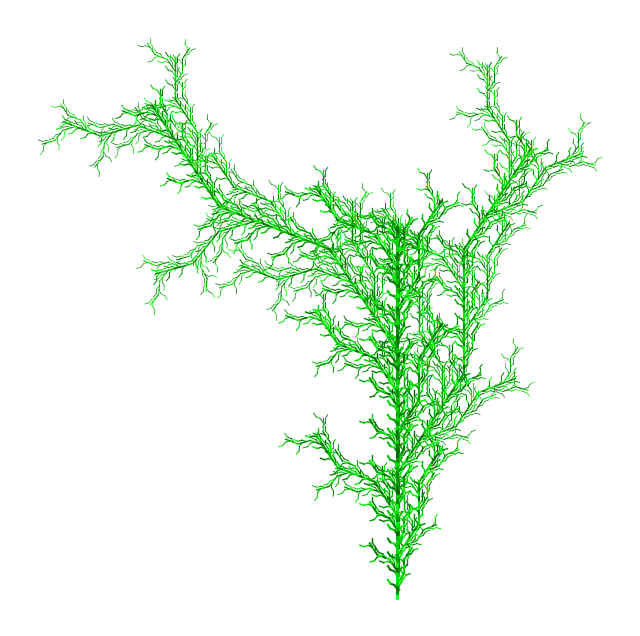

In [5]:
instructions = generate_lsystem(light_axiom, light_rules, 4)
draw_lsystem_matplotlib(instructions, angle=35, step=3, base_thickness=2, color_mode="green")

Randomly selected iterations: 5


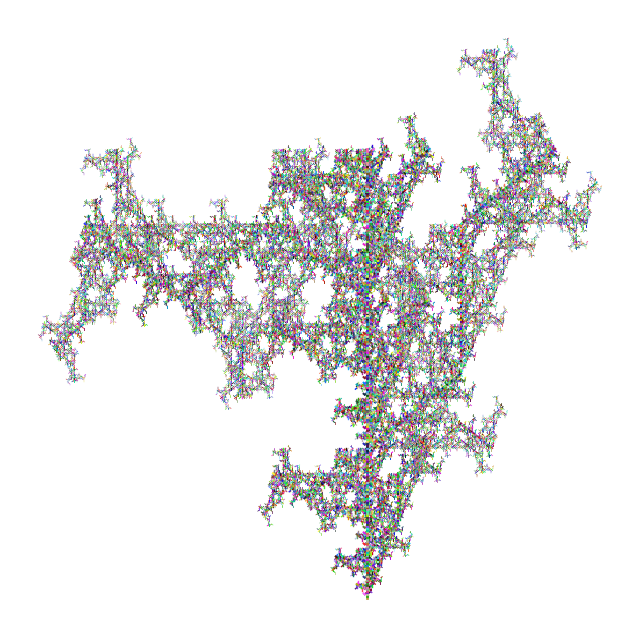

In [6]:
instructions = generate_lsystem(light_axiom, light_rules, "random" )
draw_lsystem_matplotlib(instructions, angle=60, step=2, base_thickness=2, color_mode="random")

Randomly selected iterations: 3


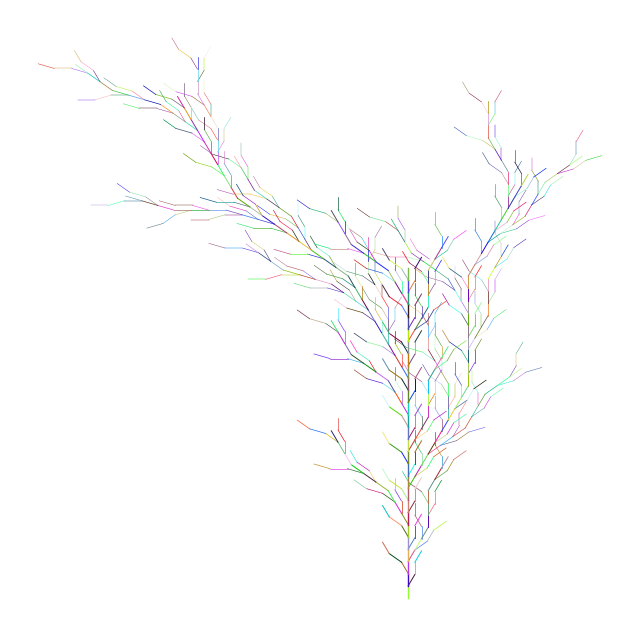

In [15]:
instructions = generate_lsystem(light_axiom, light_rules, "random" )
draw_lsystem_matplotlib(instructions, angle=22.5, step=3, base_thickness=1, color_mode="random")

Randomly selected iterations: 4


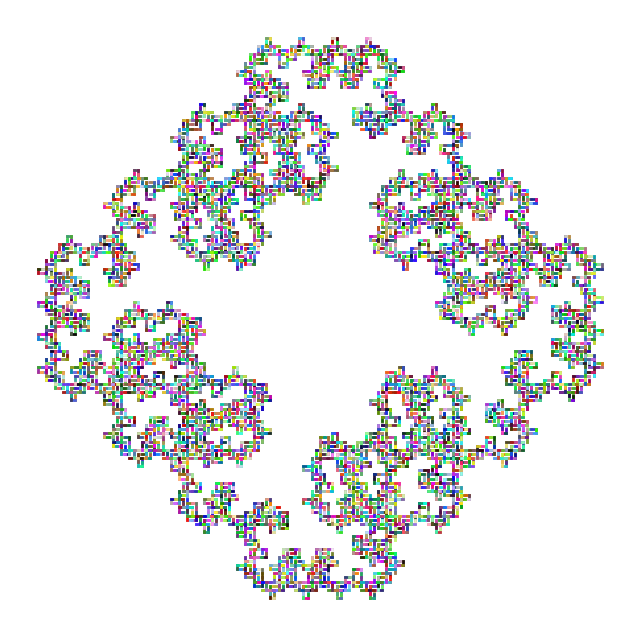

In [12]:
instructions = generate_lsystem(frame_axiom, frame_rules, "random")
draw_lsystem_matplotlib(instructions, angle=90, step=5, base_thickness=2, color_mode="random")

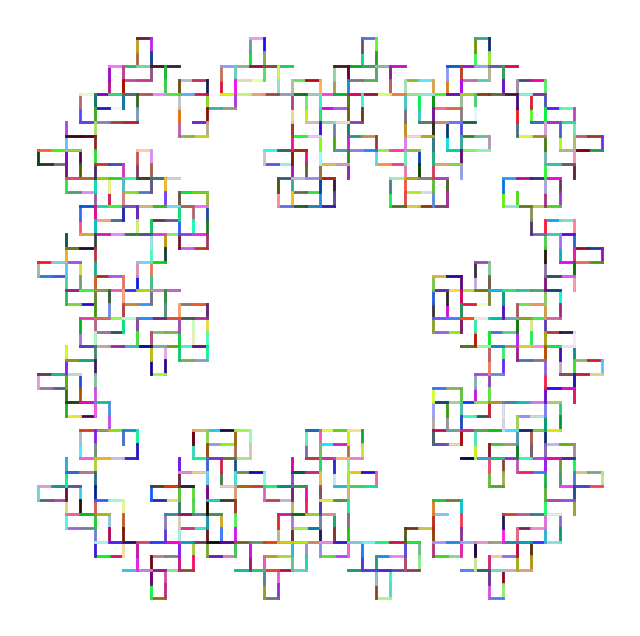

In [58]:
instructions = generate_lsystem(frame_axiom, frame_rules, 3)
draw_lsystem_matplotlib(instructions, angle=90, step=5, base_thickness=2, color_mode="random")